## Various Machine Learning Algorithms Tutorial: MNIST Dataset

In this tutorial, we will demonstrate the procedure and results of using the following algorithms with various parameters:
* Support Vector Machines (SWM)
* Convolutional Neural Networks (CNN)
* K-Nearest Neighbors Classification (KNN)
* Random Forest Classification
* Decision Tree Classification

In [1]:
import warnings; warnings.simplefilter('ignore')

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from keras.datasets import mnist

Using TensorFlow backend.


In [4]:
(X_train_load, y_train_load), (X_test_load, y_test_load) = mnist.load_data()

We can visualize the distribution of digits in the MNIST dataset by using the countplot method in Seaborn

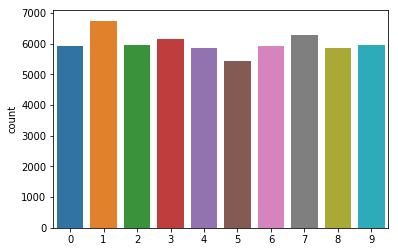

In [5]:
sns.countplot(y_train_load)

Let us visualize the first few samples of the MNIST dataset

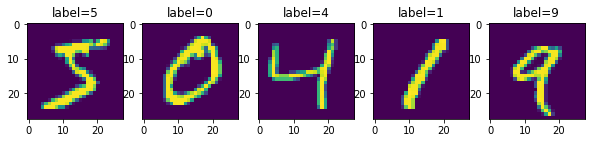

In [6]:
plt.figure(figsize=(10,5))
for i in range(0,5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_train_load[i])
    title = 'label={0:d}'.format(y_train_load[i])
    plt.title(title)

## Convolutional Neural Networks (CNN)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

In [7]:
X_train = X_train_load.reshape(X_train_load.shape[0], 28, 28, 1)
X_test = X_test_load.reshape(X_test_load.shape[0],28, 28, 1)

In [8]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [11]:
Y_train = np_utils.to_categorical(y_train_load, 10)
Y_test = np_utils.to_categorical(y_test_load, 10)

In [12]:
model = Sequential()

In [13]:
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [14]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [17]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [18]:
model.fit(X_train, Y_train, 
          batch_size=32, 
          epochs=10, 
          verbose=1)

W0807 11:33:40.496074 140735736558528 deprecation.py:323] From /Users/xiaosg/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 79s 1ms/sample - loss: 0.2066 - accuracy: 0.9366
Epoch 2/10
60000/60000 [==============================] - 73s 1ms/sample - loss: 0.0905 - accuracy: 0.9725
Epoch 3/10
60000/60000 [==============================] - 72s 1ms/sample - loss: 0.0677 - accuracy: 0.9796
Epoch 4/10
60000/60000 [==============================] - 77s 1ms/sample - loss: 0.0564 - accuracy: 0.9828
Epoch 5/10
60000/60000 [==============================] - 78s 1ms/sample - loss: 0.0494 - accuracy: 0.9848
Epoch 6/10
60000/60000 [==============================] - 74s 1ms/sample - loss: 0.0435 - accuracy: 0.9862
Epoch 7/10
60000/60000 [==============================] - 68s 1ms/sample - loss: 0.0380 - accuracy: 0.9875
Epoch 8/10
60000/60000 [==============================] - 73s 1ms/sample - loss: 0.0333 - accuracy: 0.9894
Epoch 9/10
60000/60000 [==============================] - 75s 1ms/sample - loss: 0.0315 - accuracy: 0.9894
Epoch 10/10
60

In [19]:
model.evaluate(X_test, Y_test, verbose=1)

10000/10000 [==============================] - 4s 394us/sample - loss: 0.0329 - accuracy: 0.9897


[0.03291036707865296, 0.9897]

## Support Vector Machines (SWM)

In [5]:
from sklearn import svm

In [6]:
X_train = X_train_load.reshape(X_train_load.shape[0], 28*28)
X_test = X_test_load.reshape(X_test_load.shape[0],28*28)

In [7]:
X_train.shape

(60000, 784)

In [8]:
y_test_load.shape

(10000,)

In [9]:
clf = svm.SVC(gamma=0.1, kernel='poly', random_state = 8)

In [10]:
clf.fit(X_train, y_train_load)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
  max_iter=-1, probability=False, random_state=8, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
clf.score(X_test, y_test_load)

0.9787

In [12]:
y_hat = clf.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix

In [14]:
C = confusion_matrix(y_test_load,y_hat)
print(C)

[[ 972    0    1    1    0    3    1    0    2    0]
 [   0 1126    2    1    1    0    3    0    2    0]
 [   8    0 1006    0    2    0    5    8    3    0]
 [   0    2    1  987    0    6    0    5    6    3]
 [   2    0    2    0  965    0    3    1    0    9]
 [   2    0    0   10    1  867    3    1    5    3]
 [   4    5    1    0    3    6  937    0    2    0]
 [   0   10    9    2    1    0    0 1000    0    6]
 [   5    0    1    3    4    4    1    4  950    2]
 [   3    6    1    5    9    3    1    1    3  977]]


Text(91.68,0.5,'true value')

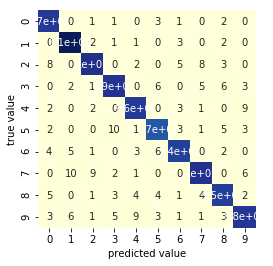

In [35]:
sns.heatmap(C.astype(int), square=True, annot=True, cbar=False, cmap="YlGnBu")
plt.xlabel('predicted value')
plt.ylabel('true value')

## K-Nearest Neighbors (KNN)

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
clf = KNeighborsClassifier()

In [30]:
clf.fit(X_train, y_train_load)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [31]:
# Recall that KNN is an exhaustive search algorithm thus the runtime will be significantly longer than other algorithms
# Please allow about 30 minutes
clf.score(X_test, y_test_load)

0.9688

## Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier

/Users/xiaosg/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [25]:
clf = RandomForestClassifier(n_estimators=100)

In [26]:
clf.fit(X_train, y_train_load)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [27]:
clf.score(X_test, y_test_load)

0.9679

## Decision Tree Classifier

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=32, max_features=784)

In [22]:
clf.fit(X_train, y_train_load)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=32,
            max_features=784, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [23]:
clf.score(X_test, y_test_load)

0.8797

## Conclusion

We have shown that various classification and deep learning algorithms have proved to yield high accuracies on the MNIST dataset.

Techniques shown in previous tutorials such as using a grid search or a random search can better improve the accuracy for the decision tree, random forest, and KNN classifiers